# Regressão Linear com PyTorch

## Objetivo

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se
- o cálculo do gradiente automático do PyTorch, porém
- a função de perda e
- atualização dos parâmetros é feita de forma explícita.
- A rede é criada com uma camada nn.Linear()

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinear_Otimizacao.png)

## Importação dos pacotes

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris

import torch
from torch import nn, optim
from torch.autograd import Variable

torch.manual_seed(1234)

## Leitura dos dados

In [45]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [46]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [47]:
print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train[:5]:
 [[1.        ]
 [0.71428573]
 [0.952381  ]
 [0.28571424]
 [0.7619048 ]]
y_train[:5]:
 [[0.80952376]
 [0.71428573]
 [0.90476197]
 [0.4761905 ]
 [0.7619048 ]]


In [48]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [49]:
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428573],
       [1.        , 0.95238101],
       [1.        , 0.28571424],
       [1.        , 0.76190478],
       [1.        , 0.38095227],
       [1.        , 0.66666675],
       [1.        , 0.        ],
       [1.        , 0.80952376],
       [1.        , 0.14285702],
       [1.        , 0.047619  ],
       [1.        , 0.47619051],
       [1.        , 0.52380949],
       [1.        , 0.57142848],
       [1.        , 0.33333325],
       [1.        , 0.85714275],
       [1.        , 0.33333325],
       [1.        , 0.42857149],
       [1.        , 0.61904752],
       [1.        , 0.33333325],
       [1.        , 0.47619051],
       [1.        , 0.57142848],
       [1.        , 0.66666675],
       [1.        , 0.57142848],
       [1.        , 0.71428573],
       [1.        , 0.80952376],
       [1.        , 0.90476197],
       [1.        , 0.85714275],
       [1.        , 0.52380949],
       [1.        , 0.38095227],
       [1.

In [50]:
print('x_train_bias.shape:',x_train_bias.shape, x_train_bias.dtype)

x_train_bias.shape: (50, 2) float64


In [51]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)
print(y_train)

tensor([[0.8095],
        [0.7143],
        [0.9048],
        [0.4762],
        [0.7619],
        [0.7143],
        [0.8095],
        [0.1429],
        [0.7619],
        [0.4286],
        [0.2381],
        [0.5714],
        [0.4762],
        [0.8095],
        [0.2857],
        [0.6667],
        [0.7143],
        [0.5238],
        [0.7143],
        [0.4286],
        [0.8571],
        [0.4762],
        [0.9048],
        [0.8095],
        [0.6190],
        [0.6667],
        [0.8571],
        [0.9524],
        [0.7143],
        [0.2381],
        [0.3810],
        [0.3333],
        [0.4286],
        [1.0000],
        [0.7143],
        [0.7143],
        [0.8095],
        [0.6667],
        [0.5238],
        [0.4762],
        [0.6667],
        [0.7619],
        [0.4762],
        [0.1429],
        [0.5714],
        [0.5714],
        [0.5714],
        [0.6190],
        [0.0000],
        [0.5238]])


## Model

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinearNeuronio.png)

In [52]:
#Inicialização usando toch.nn.Linear

model = torch.nn.Linear(in_features=2, out_features=1, bias=False)

### Verificando a inicialização dos parâmetros

In [53]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight

/tmp/ipython-input-2197199425.py:2: FutureWarning: `nn.init.uniform` is now deprecated in favor of `nn.init.uniform_`.
  torch.nn.init.uniform(model.weight.data, -0.1, 0.1)


Parameter containing:
tensor([[-0.0480, -0.0267]], requires_grad=True)

In [54]:
#Inicialização usando toch.nn.Linear

model2 = torch.nn.Linear(in_features=1, out_features=1, bias=True)

### Testando o predict da rede

In [55]:
xx = torch.ones((5,2))
xx

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [56]:
model(Variable(xx))

tensor([[-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747]], grad_fn=<MmBackward0>)

In [57]:
model(x_train_bias)

tensor([[-0.0747],
        [-0.0671],
        [-0.0734],
        [-0.0557],
        [-0.0684],
        [-0.0582],
        [-0.0658],
        [-0.0480],
        [-0.0696],
        [-0.0518],
        [-0.0493],
        [-0.0607],
        [-0.0620],
        [-0.0633],
        [-0.0569],
        [-0.0709],
        [-0.0569],
        [-0.0595],
        [-0.0645],
        [-0.0569],
        [-0.0607],
        [-0.0633],
        [-0.0658],
        [-0.0633],
        [-0.0671],
        [-0.0696],
        [-0.0722],
        [-0.0709],
        [-0.0620],
        [-0.0582],
        [-0.0557],
        [-0.0557],
        [-0.0595],
        [-0.0620],
        [-0.0544],
        [-0.0620],
        [-0.0709],
        [-0.0658],
        [-0.0569],
        [-0.0557],
        [-0.0557],
        [-0.0633],
        [-0.0595],
        [-0.0493],
        [-0.0569],
        [-0.0582],
        [-0.0582],
        [-0.0645],
        [-0.0506],
        [-0.0582]], grad_fn=<MmBackward0>)

## Treinamento

In [58]:
num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):
    #inputs = Variable(x_train_bias)
    #target = Variable(y_train)
    inputs = x_train_bias
    target = y_train

    # forward - predict
    y_pred = model(inputs)

    #loss cálculo da função de perda
    loss = torch.mean((y_pred - target)**2)

    # backward propagation - cálculo gradient
    loss.backward()

    # gradiente descendente
    model.weight.data = model.weight.data - learning_rate * model.weight.grad.data

    # zeragem parâmetros próximo cálculo do gradiente
    model.weight.grad.data.zero_()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data))

Epoch[20/100], loss: 0.022983
Epoch[40/100], loss: 0.021432
Epoch[60/100], loss: 0.021207
Epoch[80/100], loss: 0.021175
Epoch[100/100], loss: 0.021170


## Avaliação

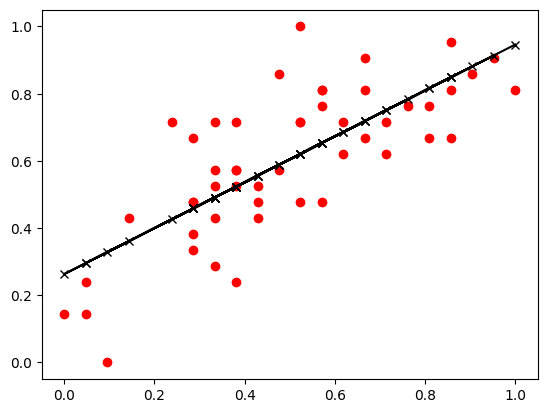

In [59]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

### Acessando os parâmetros

In [60]:
w_dic = model.state_dict()
w_dic

OrderedDict([('weight', tensor([[0.2631, 0.6830]]))])

### Parâmetros ótimos, solução analítica

In [61]:
x_bias = x_train_bias
y = y_train
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
print(torch.t(w_opt))

tensor([[0.2613, 0.6865]])


# Exercícios

- 1) Por que no final da varredura do laço de treinamento, a perda é impressa utilizando
   `loss.data`? Por que precisa do `data`?
   

- 2) Calcule e imprima o valor da perda (MSE) fazendo o predict da rede com os pesos já
   treinados.

- 3) Crie duas listas `w0_list` e `w1_list` para guardar a evolução dos valores dos
   parâmetros durante o laço de treinamento.
   Modifique o exemplo do gráfico tipo **scatter plot** para visualizar a variação
   dos parâmetros do modelo duas dimensões.
   Marque neste gráfico o valor ótimo do parâmetro dado pela solução
   analítica.

In [62]:
#1

A variável loss é um Tensor do PyTorch que faz parte do grafo de computação e tem o atributo requires_grad=True (ou grad_fn definido, como no seu notebook).

- loss (o Tensor): Representa o resultado da função de perda e carrega consigo todo o histórico de operações (grad_fn) necessário para o cálculo automático do gradiente (loss.backward()).

- .data (o atributo): Ao acessar o atributo .data de um Tensor, você obtém a matriz NumPy (ou os valores brutos) sem o histórico de operações do grafo.

Motivo do uso de .data para imprimir:

O objetivo de imprimir ou logar a perda é apenas visualizar o valor numérico e monitorar o progresso do treinamento. Você não deseja incluir essa operação de impressão no grafo de computação do PyTorch. Se você tentasse operações como print(loss) dentro do loop de treinamento, o PyTorch emitiria um aviso ou erro, pois ele entende que você está tentando criar um novo nó no grafo a partir de um Tensor que já foi usado no backpropagation (ou potencialmente violando a intenção de não usar o resultado da perda para calcular mais gradientes).

Ao usar loss.data, você "desconecta" o valor do grafo, obtendo apenas o valor numérico do Tensor, o que é seguro para operações que não fazem parte do treinamento, como registro e impressão.

In [63]:
#2
# Calcular a função de perda (MSE)
loss = torch.mean((y_pred - target)**2)
loss.item()

0.02117014490067959

In [64]:
#3

num_epochs = 100
learning_rate = 0.5

w0_list = []
w1_list = []

for epoch in range(num_epochs):
    inputs = x_train_bias
    target = y_train

    # forward - predict
    y_pred = model(inputs)

    # loss cálculo da função de perda
    loss = torch.mean((y_pred - target)**2)


    w0_list.append(model.weight.data[0][0].item())
    w1_list.append(model.weight.data[0][1].item())


    # backward propagation - cálculo gradient
    loss.backward()

    # gradiente descendente
    model.weight.data = model.weight.data - learning_rate * model.weight.grad.data

    # zeragem parâmetros próximo cálculo do gradiente
    model.weight.grad.data.zero_()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.item()))

Epoch[20/100], loss: 0.021170
Epoch[40/100], loss: 0.021169
Epoch[60/100], loss: 0.021169
Epoch[80/100], loss: 0.021169
Epoch[100/100], loss: 0.021169


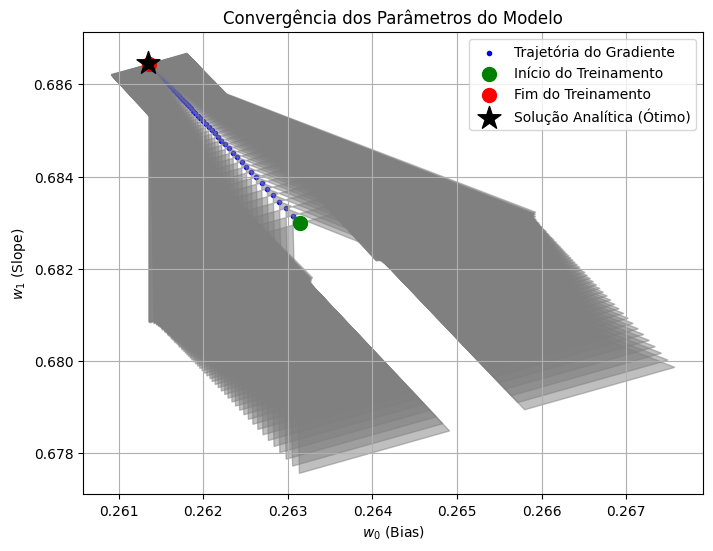

In [65]:
w0_opt = w_opt[0].item() # Peso 0 (Bias)
w1_opt = w_opt[1].item() # Peso 1 (Slope)

plt.figure(figsize=(8, 6))

# 1. Plota a trajetória da otimização (pontos e setas)
plt.scatter(w0_list, w1_list, c='blue', marker='.', label='Trajetória do Gradiente')
w0_old = None
w1_old = None
for (w0, w1) in zip(w0_list, w1_list):
    if w0_old is not None:
        # Plota a seta (arrow)
        plt.arrow(w0_old, w1_old, w0 - w0_old, w1 - w1_old,
                  head_length=0.005, head_width=0.005, shape='full',
                  length_includes_head=True, color='gray', alpha=0.5)
    w0_old, w1_old = w0, w1

# Marca o ponto de início (primeiro elemento da lista)
plt.scatter(w0_list[0], w1_list[0], c='green', marker='o', s=100, label='Início do Treinamento')

# Marca o ponto final (último elemento da lista)
plt.scatter(w0_list[-1], w1_list[-1], c='red', marker='o', s=100, label='Fim do Treinamento')

# Marca a solução analítica (o ponto ótimo)
plt.scatter(w0_opt, w1_opt, c='black', marker='*', s=300, label='Solução Analítica (Ótimo)')

plt.title('Convergência dos Parâmetros do Modelo')
plt.xlabel('$w_0$ (Bias)')
plt.ylabel('$w_1$ (Slope)')
plt.legend()
plt.grid(True)
plt.show()

## Ploting vectors

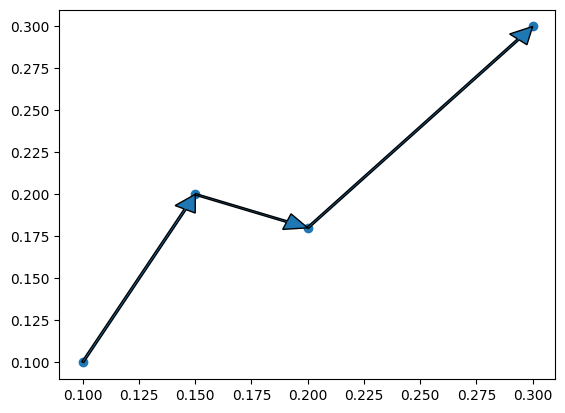

In [66]:
# Exemplo
w0_list = [0.1, 0.15, 0.2, 0.3]
w1_list = [0.1, 0.2, 0.18, 0.3]
plt.scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1

# Aprendizados

- loss.data e .item(): O atributo .data (ou o método .item() para tensores de um elemento) foi crucial para acessar o valor numérico da perda durante o logging do treinamento. Usá-lo impede que o PyTorch tente rastrear essas operações de logging como parte do grafo de computação, evitando erros ou warnings.

- Convergência Visual: O gráfico de convergência do Exercício 3 mostra visualmente a eficácia do Gradiente Descendente: os parâmetros w0​ e w1​ (Trajetória do Gradiente) se movem de seu ponto inicial em direção ao Ótimo Analítico, provando que o algoritmo encontrou a solução de mínimos quadrados para o problema.